# MARATONA BEHIND THE CODE 2020

## DESAFIO 4 - Algar
## Desenvolvido por Cinthya Oestreich Silva
### O notebook foi cedido pela IBM. Minha implementação foi focada no ajuste dos dados e escolha do melhor modelo. Além das visualização dos resultados.

<hr>

## Installing Libs

In [1]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in c:\users\cinth\anaconda3\envs\ml\lib\site-packages (1.2.0)


In [2]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in c:\users\cinth\anaconda3\envs\ml\lib\site-packages (0.0)


<hr>

In [3]:
!pip install imbalanced-learn

## Importando bibliotecas 
### Scikit-learn . https://scikit-learn.org/stable/index.html
### Pandas https://pandas.pydata.org/pandas-docs/stable/index.html
### Numpy https://numpy.org/
### Matplotlib https://matplotlib.org/
### Imblearn https://imbalanced-learn.readthedocs.io/en/stable/api.html

In [4]:
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


import imblearn

## Download dos conjuntos de dados em formato .csv

In [5]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'train_dataset_algartech.csv')
df_training_dataset.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,...,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
1365,23,Misto,638,Vendas,9,Superior completo,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Sim
1366,29,Misto,1092,Engenharia,1,Superior incompleto - cursando,Medicina,1,2027,1,...,80,3,4,3,4,2,2,2,2,Sim
1367,56,Cliente,310,Engenharia,7,Superior incompleto,Faculdade Técnica,1,2032,4,...,80,1,14,4,1,10,9,9,8,Sim
1368,50,Misto,878,Vendas,1,Superior incompleto - cursando,Ciências das natureza,1,2044,2,...,80,2,12,3,3,6,3,0,1,Sim
1369,50,Cliente,410,Vendas,28,Superior completo,Marketing,1,2055,4,...,80,1,20,3,3,3,2,2,0,Sim


## Imprimindo as informações do dataframe via metodo .info()

In [6]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       1370 non-null   int64 
 1   Local de trabalho                           1370 non-null   object
 2   Pontuação teste                             1370 non-null   int64 
 3   Departmento                                 1370 non-null   object
 4   Distancia casa-trabalho                     1370 non-null   int64 
 5   Educacao                                    1370 non-null   object
 6   Area                                        1370 non-null   object
 7   Possui carro                                1370 non-null   int64 
 8   Subordinado                                 1370 non-null   int64 
 9   Satisfação com o ambiente no emprego atual  1370 non-null   int64 
 10  Genero                  

In [7]:
df_training_dataset.nunique()

Idade                                           43
Local de trabalho                                3
Pontuação teste                                853
Departmento                                      3
Distancia casa-trabalho                         29
Educacao                                         5
Area                                             6
Possui carro                                     1
Subordinado                                   1370
Satisfação com o ambiente no emprego atual       4
Genero                                           2
Horas voluntariado                              71
Envolvimento com trabalho                        4
Posicao                                          5
Cargo                                            9
Satisfação com emprego                           4
Estado civil                                     3
Renda                                         1269
Bonus de performance                          1329
Quantidade de empresas que trab

# Atenção!

A coluna-alvo neste desafio é a coluna ``Contratar``

<hr>

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [11]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [12]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Idade                                         0
Local de trabalho                             0
Pontuação teste                               0
Departmento                                   0
Distancia casa-trabalho                       0
Educacao                                      0
Area                                          0
Possui carro                                  0
Subordinado                                   0
Satisfação com o ambiente no emprego atual    0
Genero                                        0
Horas voluntariado                            0
Envolvimento com trabalho                     0
Posicao                                       0
Cargo                                         0
Satisfação com emprego                        0
Estado civil                                  0
Renda                                         0
Bonus de performance                          0
Quantidade 

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [13]:
df_training_dataset_imputed.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,...,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
1365,23,Misto,638,Vendas,9,Superior completo,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Sim
1366,29,Misto,1092,Engenharia,1,Superior incompleto - cursando,Medicina,1,2027,1,...,80,3,4,3,4,2,2,2,2,Sim
1367,56,Cliente,310,Engenharia,7,Superior incompleto,Faculdade Técnica,1,2032,4,...,80,1,14,4,1,10,9,9,8,Sim
1368,50,Misto,878,Vendas,1,Superior incompleto - cursando,Ciências das natureza,1,2044,2,...,80,2,12,3,3,6,3,0,1,Sim
1369,50,Cliente,410,Vendas,28,Superior completo,Marketing,1,2055,4,...,80,1,20,3,3,3,2,2,0,Sim


In [14]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Area','Idade','Distancia casa-trabalho','Quantidade de empresas que trabalho','Possui carro','Horas de trabalho padrão','Estado civil','Maior de idade','Local de trabalho','Subordinado','Genero','Departmento','Necessita de hora extra','Anos com a mesma gerência','Horas voluntariado','Anos com a mesma gerência','Anos desde última promoção','Anos na posição atual','Anos na última empresa','Beneficios','Estilo de vida','Horas de treinamento ultimo ano','Bonus de performance'], inplace=False)

In [15]:
df_training_dataset_rmcolumns.tail()


,Pontuação teste,Educacao,Satisfação com o ambiente no emprego atual,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Renda,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Anos de experiencia,Contratar
1365,638,Superior completo,4,3,1,Vendedor junior,1,1790,19,3,1,1,Sim
1366,1092,Superior incompleto - cursando,1,3,1,Engenheiro,4,4787,14,3,2,4,Sim
1367,310,Superior incompleto,4,3,1,Tecnico,3,2339,11,3,4,14,Sim
1368,878,Superior incompleto - cursando,2,3,2,Vendedo senior,3,6728,12,3,4,12,Sim
1369,410,Superior completo,4,2,3,Vendedo senior,1,10854,13,3,2,20,Sim


In [16]:
df_training_dataset_rmcolumns.nunique()


Pontuação teste                                853
Educacao                                         5
Satisfação com o ambiente no emprego atual       4
Envolvimento com trabalho                        4
Posicao                                          5
Cargo                                            9
Satisfação com emprego                           4
Renda                                         1269
Aumento de salario%                             15
Performance na entrevista                        2
Satisfação com a relação                         4
Anos de experiencia                             40
Contratar                                        2
dtype: int64

In [17]:
#GetDummies
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
df_training_final = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Educacao','Cargo'],dummy_na=True)

#df_training_final = df_training_dataset_rmcolumns
df_training_final.tail()

,Pontuação teste,Satisfação com o ambiente no emprego atual,Envolvimento com trabalho,Posicao,Satisfação com emprego,Renda,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Anos de experiencia,...,Cargo_Analista,Cargo_Assistente,Cargo_Diretor,Cargo_Engenheiro,Cargo_Gerente,Cargo_Supervisor,Cargo_Tecnico,Cargo_Vendedo senior,Cargo_Vendedor junior,Cargo_nan
1365,638,4,3,1,1,1790,19,3,1,1,...,0,0,0,0,0,0,0,0,1,0
1366,1092,1,3,1,4,4787,14,3,2,4,...,0,0,0,1,0,0,0,0,0,0
1367,310,4,3,1,3,2339,11,3,4,14,...,0,0,0,0,0,0,1,0,0,0
1368,878,2,3,2,3,6728,12,3,4,12,...,0,0,0,0,0,0,0,1,0,0
1369,410,4,2,3,1,10854,13,3,2,20,...,0,0,0,0,0,0,0,1,0,0


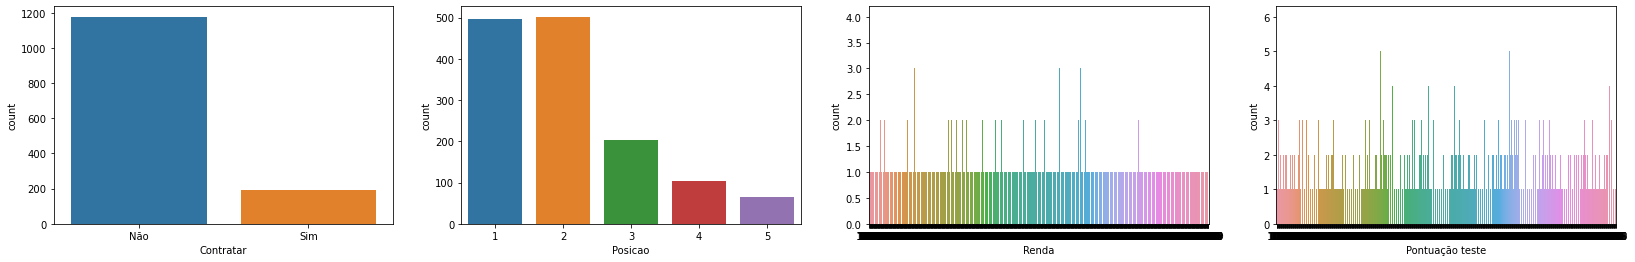

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='Contratar', data=df_training_dataset_rmcolumns)
sns.countplot(ax=axes[1], x='Posicao', data=df_training_dataset_rmcolumns)
sns.countplot(ax=axes[2], x='Renda', data=df_training_dataset_rmcolumns)
sns.countplot(ax=axes[3], x='Pontuação teste', data=df_training_dataset_rmcolumns)

# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


In [19]:
df_training_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Pontuação teste                             1370 non-null   int64 
 1   Satisfação com o ambiente no emprego atual  1370 non-null   int64 
 2   Envolvimento com trabalho                   1370 non-null   int64 
 3   Posicao                                     1370 non-null   int64 
 4   Satisfação com emprego                      1370 non-null   int64 
 5   Renda                                       1370 non-null   int64 
 6   Aumento de salario%                         1370 non-null   int64 
 7   Performance na entrevista                   1370 non-null   int64 
 8   Satisfação com a relação                    1370 non-null   int64 
 9   Anos de experiencia                         1370 non-null   int64 
 10  Contratar               

<hr>

## Treinando 


### Selecionando FEATURES e definindo a variável CONTRATAR


In [66]:
df_training_final.columns

Index(['Pontuação teste', 'Satisfação com o ambiente no emprego atual',
       'Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego',
       'Renda', 'Aumento de salario%', 'Performance na entrevista',
       'Satisfação com a relação', 'Anos de experiencia', 'Contratar',
       'Educacao_Médio completo', 'Educacao_Pós-gradução',
       'Educacao_Superior completo', 'Educacao_Superior incompleto',
       'Educacao_Superior incompleto - cursando', 'Educacao_nan',
       'Cargo_Analista', 'Cargo_Assistente', 'Cargo_Diretor',
       'Cargo_Engenheiro', 'Cargo_Gerente', 'Cargo_Supervisor',
       'Cargo_Tecnico', 'Cargo_Vendedo senior', 'Cargo_Vendedor junior',
       'Cargo_nan'],
      dtype='object')

In [67]:
features = df_training_final[
    [
        'Pontuação teste', 'Satisfação com o ambiente no emprego atual',
       'Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego',
       'Renda', 'Aumento de salario%', 'Performance na entrevista',
       'Satisfação com a relação', 'Anos de experiencia',
       'Educacao_Médio completo', 'Educacao_Pós-gradução',
       'Educacao_Superior completo', 'Educacao_Superior incompleto',
       'Educacao_Superior incompleto - cursando', 'Educacao_nan',
       'Cargo_Analista', 'Cargo_Assistente', 'Cargo_Diretor',
       'Cargo_Engenheiro', 'Cargo_Gerente', 'Cargo_Supervisor',
       'Cargo_Tecnico', 'Cargo_Vendedo senior', 'Cargo_Vendedor junior',
       'Cargo_nan'
    ]
]
target = df_training_final['Contratar']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [68]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

import imblearn
from imblearn.over_sampling import SMOTE

#Nest caso usamos o smote para balancear a base
oversample = SMOTE()
X, y = oversample.fit_resample(features, target)



In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=133)

### Neste caso utilizei alguns algoritmos para descobrir qual seria o melhor para odesafio. 

In [70]:
import urllib
import random 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn import svm, datasets


#dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)

rng = np.random.RandomState(123)

lr = LogisticRegression(C=1e5,solver='lbfgs',max_iter = 500)
dt =  DecisionTreeClassifier(criterion='entropy')
knn = KNeighborsClassifier(n_neighbors=3)
mlp = MLPClassifier(solver='sgd', early_stopping=True, hidden_layer_sizes=(1000), activation='logistic', batch_size=100, max_iter=10000, learning_rate_init=0.1, momentum=0.2, tol=1e-10, random_state=rng)
nb = GaussianNB(var_smoothing=1e-09)

# Define ensembles
#rf = RandomForestClassifier(criterion ='entropy', min_samples_split = 6, n_estimators=100, random_state=0)
rf = RandomForestClassifier(max_features = 'sqrt', criterion ='entropy', min_samples_split = 20, n_estimators=100, random_state=50, oob_score = True)


# parameters for SVM

#linear_svc = svm.SVC(kernel='linear')

rbf_svc = svm.SVC(kernel='rbf')

xgb = XGBClassifier(  learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=10)
# antes max_depht = 4
cb = VotingClassifier(estimators=[('RandonFlorest', rf), ('Xboost', xgb)], voting='soft')

titles = ['LogisticRegresson', 'DecisionTree', 'KNN', 'NaiveBayes', 'MLP', 'RF', 'RF+XGB', 'RBF SVC' , 'xgb']
methods = [lr, dt, knn, nb, mlp, rf, cb, rbf_svc, xgb]


### O melhor resultado de acurácia foi com o um esemble de Xboost com Randon Florest

In [120]:
scores = []
for method, name in zip(methods, titles):
    method.fit(X_train, y_train)
    scores.append(method.score(X_test, y_test))
    print("Classification accuracy {} = {}"
          .format(name, method.score(X_test, y_test)))

C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification accuracy LogisticRegresson = 0.8571428571428571
Classification accuracy DecisionTree = 0.8698727015558698
Classification accuracy KNN = 0.7128712871287128
Classification accuracy NaiveBayes = 0.751060820367751
Classification accuracy MLP = 0.4780763790664781
Classification accuracy RF = 0.8656294200848657
Classification accuracy RF+XGB = 0.8811881188118812
Classification accuracy RBF SVC = 0.611032531824611
Classification accuracy xgb = 0.8868458274398868


### Depois de análisar a acurácia é importante verificar o recall, f1 score e a matriz de confusão. 
### Este estudo é importante para entender qual a porcentagem de acertos de cada classe.
### Importante lembrar que não é interessante possuir uma acurácia alta sendo este acurácia o acerto de apenas uma classe. Esse cenário se intensifica quando temos mais classes. 

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

LogisticRegresson
               SIM       NÃO
F1-Score  0.862585  0.851252
Precisão  0.798489  0.932258
Recall    0.937870  0.783198


DecisionTree
               SIM       NÃO
F1-Score  0.856716  0.870968
Precisão  0.864458  0.864000
Recall    0.849112  0.878049


KNN
               SIM       NÃO
F1-Score  0.672052  0.744654
Precisão  0.740214  0.694836
Recall    0.615385  0.802168


NaiveBayes
               SIM       NÃO
F1-Score  0.696552  0.788969
Precisão  0.834711  0.707527
Recall    0.597633  0.891599




C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP
               SIM  NÃO
F1-Score  0.646890  0.0
Precisão  0.478076  0.0
Recall    1.000000  0.0


RF
               SIM       NÃO
F1-Score  0.868603  0.862518
Precisão  0.815584  0.925466
Recall    0.928994  0.807588


RF+XGB
               SIM       NÃO
F1-Score  0.883333  0.878963
Precisão  0.832461  0.938462
Recall    0.940828  0.826558


RBF SVC
               SIM       NÃO
F1-Score  0.616457  0.605452
Precisão  0.583113  0.643293
Recall    0.653846  0.571816


xgb
               SIM       NÃO
F1-Score  0.888579  0.885057
Precisão  0.839474  0.941896
Recall    0.943787  0.834688




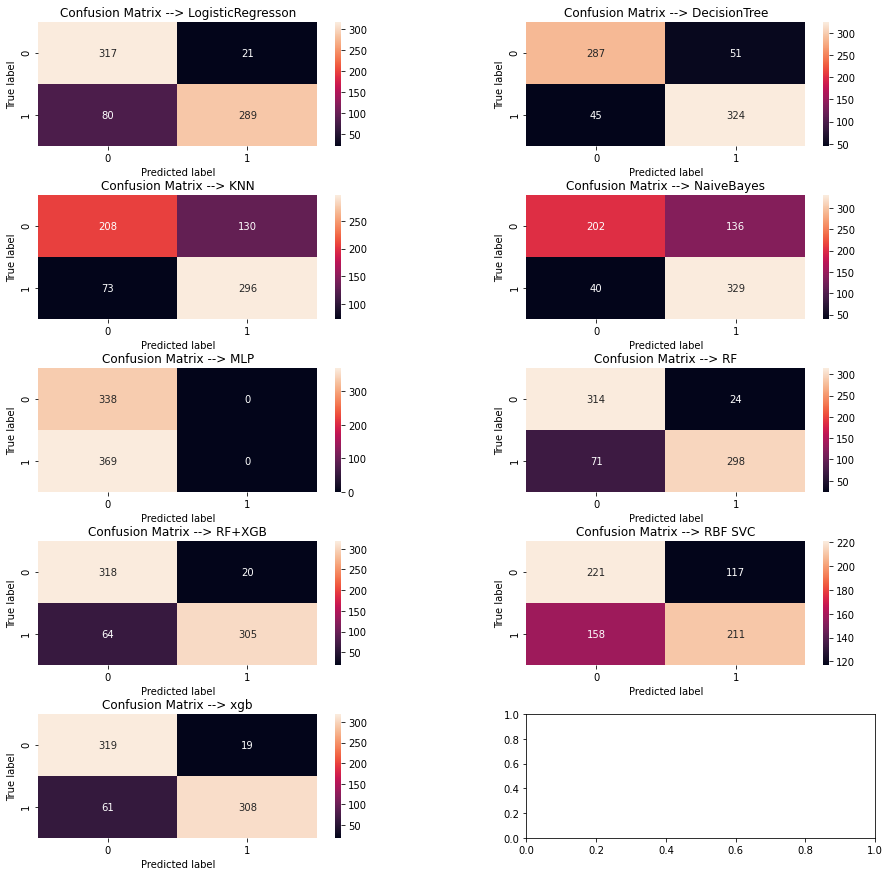

<Figure size 432x288 with 0 Axes>

In [81]:
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

fig3, sub1 = plt.subplots(5, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
class_names=['SIM', 'NÃO'] 
for clf, ax, title in zip(methods, sub1.flatten(), titles):
    y_predicted = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    #plot_confusion_matrix(ax, cm, title)
    df_cm = pd.DataFrame(cm, index = [i for i in "01"],
                  columns = [i for i in "01"])
    sns.heatmap(df_cm, annot=True, ax=ax, fmt = 'd')
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fScore = f1_score(y_test, y_predicted ,average=None)
    precision = precision_score(y_test, y_predicted ,average=None)
    recall = recall_score(y_test, y_predicted ,average=None)
    
    numpy_data = np.array([fScore,precision,recall]) 
    df = pd.DataFrame(data=numpy_data, index=["F1-Score", "Precisão","Recall"], columns = class_names)
    print(title )
    print(df)
    print('\n')

plt.show()
plt.tight_layout()

### Deep learning
### Antes de decidir o melhor modelo foi realizado um teste com deep learning para verificar se o melhor caso poderia ser utilizando este método. 


In [43]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

#Target com binário 
# Antes de começar foi preciso transformar nosso target em binário. 
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [44]:
#Aqui conseguimos ver a transformação e que o Sim se transformou em 1 e o não se transformou em 0. 
print(y_test)
print(y_test_enc)

1560    Sim
7       Não
1214    Sim
1748    Sim
1771    Sim
       ... 
1308    Sim
1294    Sim
1816    Sim
908     Não
1093    Não
Name: Contratar, Length: 707, dtype: object
[1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1
 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1
 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1
 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout

#Aqui montamos nossa deep learning. 
model = Sequential()
model.add(Dense(8, input_dim=26, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(8, activation='softmax'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_enc, epochs=200, batch_size=20)

Epoch 1/200
1649/1649 [==============================] - 0s 85us/step - loss: 21.0156 - accuracy: 0.4967
Epoch 2/200
1649/1649 [==============================] - 0s 33us/step - loss: 0.8859 - accuracy: 0.4906
Epoch 3/200
1649/1649 [==============================] - 0s 37us/step - loss: 0.9997 - accuracy: 0.4912
Epoch 4/200
1649/1649 [==============================] - 0s 34us/step - loss: 0.9034 - accuracy: 0.5149
Epoch 5/200
1649/1649 [==============================] - 0s 36us/step - loss: 1.0478 - accuracy: 0.5391
Epoch 6/200
1649/1649 [==============================] - 0s 34us/step - loss: 0.9786 - accuracy: 0.5349
Epoch 7/200
1649/1649 [==============================] - 0s 35us/step - loss: 0.9158 - accuracy: 0.5446
Epoch 8/200
1649/1649 [==============================] - 0s 34us/step - loss: 0.9482 - accuracy: 0.5349
Epoch 9/200
1649/1649 [==============================] - 0s 34us/step - loss: 0.9989 - accuracy: 0.5652
Epoch 10/200
1649/1649 [==============================] - 0s 35

1649/1649 [==============================] - 0s 35us/step - loss: 0.4338 - accuracy: 0.8126
Epoch 80/200
1649/1649 [==============================] - 0s 34us/step - loss: 0.4640 - accuracy: 0.7890
Epoch 81/200
1649/1649 [==============================] - 0s 34us/step - loss: 0.4937 - accuracy: 0.7690
Epoch 82/200
1649/1649 [==============================] - 0s 35us/step - loss: 0.4769 - accuracy: 0.7835
Epoch 83/200
1649/1649 [==============================] - 0s 35us/step - loss: 0.5803 - accuracy: 0.7605
Epoch 84/200
1649/1649 [==============================] - 0s 34us/step - loss: 0.4503 - accuracy: 0.8011
Epoch 85/200
1649/1649 [==============================] - 0s 35us/step - loss: 0.7205 - accuracy: 0.7077
Epoch 86/200
1649/1649 [==============================] - 0s 34us/step - loss: 0.5352 - accuracy: 0.7629
Epoch 87/200
1649/1649 [==============================] - 0s 35us/step - loss: 0.4919 - accuracy: 0.7841
Epoch 88/200
1649/1649 [==============================] - 0s 36us/st

1649/1649 [==============================] - 0s 33us/step - loss: 0.4823 - accuracy: 0.7902
Epoch 157/200
1649/1649 [==============================] - 0s 33us/step - loss: 0.5273 - accuracy: 0.7762
Epoch 158/200
1649/1649 [==============================] - 0s 32us/step - loss: 0.4357 - accuracy: 0.8126
Epoch 159/200
1649/1649 [==============================] - 0s 33us/step - loss: 0.3960 - accuracy: 0.8351
Epoch 160/200
1649/1649 [==============================] - 0s 34us/step - loss: 0.6421 - accuracy: 0.7508
Epoch 161/200
1649/1649 [==============================] - 0s 34us/step - loss: 0.5051 - accuracy: 0.7914
Epoch 162/200
1649/1649 [==============================] - 0s 34us/step - loss: 0.4636 - accuracy: 0.8090
Epoch 163/200
1649/1649 [==============================] - 0s 34us/step - loss: 0.6123 - accuracy: 0.7623
Epoch 164/200
1649/1649 [==============================] - 0s 41us/step - loss: 0.3446 - accuracy: 0.8605
Epoch 165/200
1649/1649 [==============================] - 0

### Analisando a qualidade do modelo através da matriz de confusão
#### Apesar de a acurácia não ser ruim ela está longe da nosso esemble de Xboost e Randon Florest. 

F1 Score: [0.82758621 0.76744186]
Precision: [0.70886076 0.99141631]
Recall: [0.99408284 0.62601626]


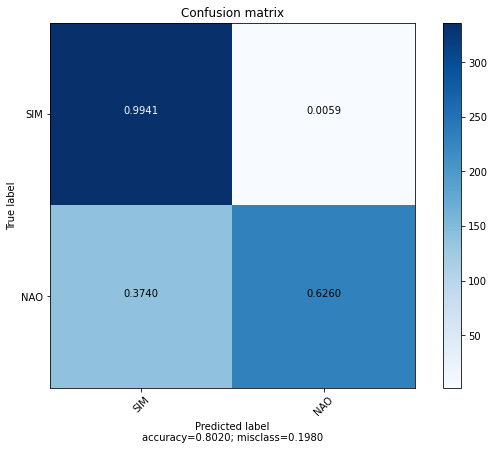

In [51]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict_classes(X_test)
fScore = f1_score(y_test_enc, y_pred ,average=None)
precision = precision_score(y_test_enc, y_pred ,average=None)
recall = recall_score(y_test_enc, y_pred ,average=None)

print("F1 Score:", fScore)
print("Precision:", precision)
print("Recall:", recall)

plot_confusion_matrix(confusion_matrix(y_test_enc, y_pred), ['SIM', 'NAO'])


## Análise Final
### Depois de análisar todos os dados cheguei a conclusão que a melhor opção seria utilizar o Xboost para a entrega do desafio.  

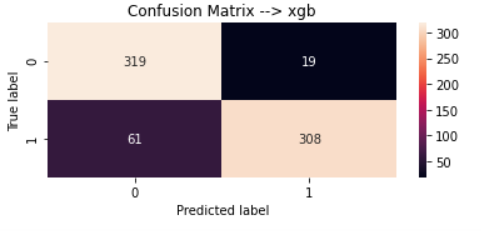


<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [133]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_algartech.csv',sep=',')
df_to_be_scored.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,...,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência
95,37,Cliente,504,Engenharia,10,Superior completo,Medicina,1,342,1,...,2,80,2,17,5,3,1,0,0,0
96,31,Misto,307,Engenharia,29,Superior incompleto,Medicina,1,355,3,...,2,80,0,6,2,4,5,4,1,4
97,28,Escritório,529,Engenharia,2,Superior incompleto - cursando,Ciências das natureza,1,364,1,...,3,80,0,5,5,1,0,0,0,0
98,47,Cliente,666,Engenharia,29,Superior incompleto - cursando,Ciências das natureza,1,376,1,...,4,80,1,10,2,2,10,7,9,9
99,44,Misto,920,Engenharia,24,Superior completo,Ciências das natureza,1,392,4,...,4,80,1,19,0,1,1,0,0,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [134]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       100 non-null    int64 
 1   Local de trabalho                           100 non-null    object
 2   Pontuação teste                             100 non-null    int64 
 3   Departmento                                 100 non-null    object
 4   Distancia casa-trabalho                     100 non-null    int64 
 5   Educacao                                    100 non-null    object
 6   Area                                        100 non-null    object
 7   Possui carro                                100 non-null    int64 
 8   Subordinado                                 100 non-null    int64 
 9   Satisfação com o ambiente no emprego atual  100 non-null    int64 
 10  Genero                     

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [135]:
# 1 - Removendo linhas com valores NaN em "certificados" e "total_modulos"
#df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

# 2 - Inputando zeros nos valores faltantes


# 3 - Remoção de colunas
df_to_be_scored_1 = df_to_be_scored.drop(columns=['Idade','Area','Distancia casa-trabalho','Quantidade de empresas que trabalho','Possui carro','Horas de trabalho padrão','Estado civil','Maior de idade','Local de trabalho','Subordinado','Genero','Departmento','Necessita de hora extra','Anos com a mesma gerência','Horas voluntariado','Anos com a mesma gerência','Anos desde última promoção','Anos na posição atual','Anos na última empresa','Beneficios','Estilo de vida','Horas de treinamento ultimo ano','Bonus de performance'], inplace=False)

# 4 - Encoding com "dummy variables"
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_1, columns=['Educacao','Cargo'],dummy_na=True)

df_to_be_scored_4.tail()

,Pontuação teste,Satisfação com o ambiente no emprego atual,Envolvimento com trabalho,Posicao,Satisfação com emprego,Renda,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Anos de experiencia,...,Cargo_Analista,Cargo_Assistente,Cargo_Diretor,Cargo_Engenheiro,Cargo_Gerente,Cargo_Supervisor,Cargo_Tecnico,Cargo_Vendedo senior,Cargo_Vendedor junior,Cargo_nan
95,504,1,3,3,3,10048,11,3,2,17,...,0,0,0,0,0,1,0,0,0,0
96,307,3,2,1,2,3479,11,3,2,6,...,0,0,0,0,0,0,1,0,0,0
97,529,1,3,1,3,3485,11,3,3,5,...,0,0,0,0,0,0,1,0,0,0
98,666,1,3,3,2,11849,12,3,4,10,...,0,0,0,0,1,0,0,0,0,0
99,920,4,3,1,3,3161,22,4,4,19,...,0,0,0,0,0,0,1,0,0,0


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [136]:
df_training_final[
    [
        'Pontuação teste', 'Satisfação com o ambiente no emprego atual',
       'Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego',
       'Renda', 'Aumento de salario%', 'Performance na entrevista',
       'Satisfação com a relação', 'Anos de experiencia',
       'Educacao_Médio completo', 'Educacao_Pós-gradução',
       'Educacao_Superior completo', 'Educacao_Superior incompleto',
       'Educacao_Superior incompleto - cursando', 'Educacao_nan',
       'Cargo_Analista', 'Cargo_Assistente', 'Cargo_Diretor',
       'Cargo_Engenheiro', 'Cargo_Gerente', 'Cargo_Supervisor',
       'Cargo_Tecnico', 'Cargo_Vendedo senior', 'Cargo_Vendedor junior',
       'Cargo_nan'
    ]
].columns

Index(['Pontuação teste', 'Satisfação com o ambiente no emprego atual',
       'Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego',
       'Renda', 'Aumento de salario%', 'Performance na entrevista',
       'Satisfação com a relação', 'Anos de experiencia',
       'Educacao_Médio completo', 'Educacao_Pós-gradução',
       'Educacao_Superior completo', 'Educacao_Superior incompleto',
       'Educacao_Superior incompleto - cursando', 'Educacao_nan',
       'Cargo_Analista', 'Cargo_Assistente', 'Cargo_Diretor',
       'Cargo_Engenheiro', 'Cargo_Gerente', 'Cargo_Supervisor',
       'Cargo_Tecnico', 'Cargo_Vendedo senior', 'Cargo_Vendedor junior',
       'Cargo_nan'],
      dtype='object')

In [137]:
df_to_be_scored_4.columns

Index(['Pontuação teste', 'Satisfação com o ambiente no emprego atual',
       'Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego',
       'Renda', 'Aumento de salario%', 'Performance na entrevista',
       'Satisfação com a relação', 'Anos de experiencia',
       'Educacao_Médio completo', 'Educacao_Superior completo',
       'Educacao_Superior incompleto',
       'Educacao_Superior incompleto - cursando', 'Educacao_nan',
       'Cargo_Analista', 'Cargo_Assistente', 'Cargo_Diretor',
       'Cargo_Engenheiro', 'Cargo_Gerente', 'Cargo_Supervisor',
       'Cargo_Tecnico', 'Cargo_Vendedo senior', 'Cargo_Vendedor junior',
       'Cargo_nan'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [141]:
#Como no data set de teste não possuimos a coluna porém para o treinamento ele existia. Assim foi preciso adiciona-lo
#Como ele não existe neste data set setamos ele como 0
df_to_be_scored_4['Educacao_Pós-gradução']=0
df_to_be_scored_4=df_to_be_scored_4[['Pontuação teste', 'Satisfação com o ambiente no emprego atual',
       'Envolvimento com trabalho', 'Posicao', 'Satisfação com emprego',
       'Renda', 'Aumento de salario%', 'Performance na entrevista',
       'Satisfação com a relação', 'Anos de experiencia',
       'Educacao_Médio completo', 'Educacao_Pós-gradução',
       'Educacao_Superior completo', 'Educacao_Superior incompleto',
       'Educacao_Superior incompleto - cursando', 'Educacao_nan',
       'Cargo_Analista', 'Cargo_Assistente', 'Cargo_Diretor',
       'Cargo_Engenheiro', 'Cargo_Gerente', 'Cargo_Supervisor',
       'Cargo_Tecnico', 'Cargo_Vendedo senior', 'Cargo_Vendedor junior',
       'Cargo_nan']]

In [142]:
#Neste caso fazemos a predição com o modelo ensemble treinado. E inserimos o resultado no dataset.
#Este passo era requirimento da maratona para avaliar os resultados. 
y_pred = xgb.predict(df_to_be_scored_4)
df_to_be_scored_4['$R-Contratar'] = y_pred
df_to_be_scored_4.tail()

C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Pontuação teste,Satisfação com o ambiente no emprego atual,Envolvimento com trabalho,Posicao,Satisfação com emprego,Renda,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Anos de experiencia,...,Cargo_Assistente,Cargo_Diretor,Cargo_Engenheiro,Cargo_Gerente,Cargo_Supervisor,Cargo_Tecnico,Cargo_Vendedo senior,Cargo_Vendedor junior,Cargo_nan,$R-Contratar
95,504,1,3,3,3,10048,11,3,2,17,...,0,0,0,0,1,0,0,0,0,Não
96,307,3,2,1,2,3479,11,3,2,6,...,0,0,0,0,0,1,0,0,0,Não
97,529,1,3,1,3,3485,11,3,3,5,...,0,0,0,0,0,1,0,0,0,Sim
98,666,1,3,3,2,11849,12,3,4,10,...,0,0,0,1,0,0,0,0,0,Não
99,920,4,3,1,3,3161,22,4,4,19,...,0,0,0,0,0,1,0,0,0,Não


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [143]:
#E por fim salvamos o dataset em CSV.

df_to_be_scored_4.to_csv("results_git.csv")


# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

